In [1]:
import pandas as pd
Univ = pd.read_csv("Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [2]:
Univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [3]:
# Standardization of data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(Univ.iloc[:,1:]))

In [4]:
scaled_df.describe()

,0,1,2,3,4,5
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01
mean,-5.151435e-16,-2.176037e-16,-1.598721e-16,-2.109424e-16,0.000000,1.687539e-16
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621,1.020621e+00
min,-2.462455e+00,-2.546050e+00,-1.303758e+00,-1.686251e+00,-1.321971,-2.222029e+00
25%,-2.490335e-01,-1.302435e-01,-7.863939e-01,-4.315999e-01,-0.866597,-6.445235e-01
50%,1.748132e-01,2.373792e-01,-1.655566e-01,-1.806697e-01,0.011674,3.695869e-01
75%,6.928481e-01,7.100370e-01,5.587536e-01,3.211906e-01,0.529383,8.203026e-01
max,1.399259e+00,1.235212e+00,2.628211e+00,3.081422e+00,2.560381,1.158339e+00


In [5]:
# Build Cluster
from sklearn.cluster import KMeans 
clust = KMeans(3,random_state = 42)
clust.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

In [6]:
clust.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [7]:
Univ['Clust_num'] = clust.labels_

In [8]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clust_num
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [9]:
Univ.groupby('Clust_num').agg(['mean'])

C:\Users\admin\AppData\Local\Temp\ipykernel_15768\2079283709.py:1: FutureWarning: ['Univ'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Univ.groupby('Clust_num').agg(['mean'])


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,mean,mean,mean,mean,mean,mean
Clust_num,,,,,,
0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


# Scree Plot 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


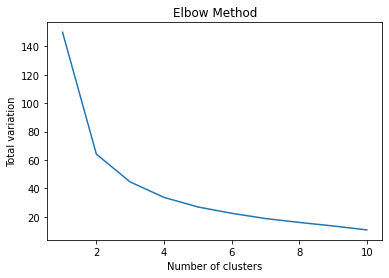

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Total variation')
plt.show()

In [11]:
wcss

[150.0,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.907807926289365,
 22.452524599848374,
 18.750021301705345,
 16.00657366889506,
 13.511072156410833,
 10.729002092323686]